## Import necessary module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

import warnings

warnings.simplefilter("ignore")

## Load the datasets from local folder

read dataset, dataset get from https://www.kaggle.com/uciml/zoo-animal-classification

In [2]:
zoo_df = pd.read_csv('zoo.csv', encoding='utf-8', delimiter = ',')

### Data Features
The dataset have following features: 
* Animal name   
* Hair       
* Feathers        
* Eggs           
* Milk
* Airborne        
* Aquatic
* Predator       
* Toothed
* Backbone        
* Breathes
* Venomous     
* Fins
* Legs          
* Tail
* Domestic
* Catsize
* Class type     

#### check the dataset head

In [3]:
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
# check unique animal name 
zoo_df.animal_name.value_counts().count()

100

### Drop animal name

The animal name type is the object. There are 101 samples and this feature is almost all values ​​unique (except only one value). I think it should be removed.

In [6]:
zoo_df.drop(columns='animal_name',inplace=True)
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Histograms

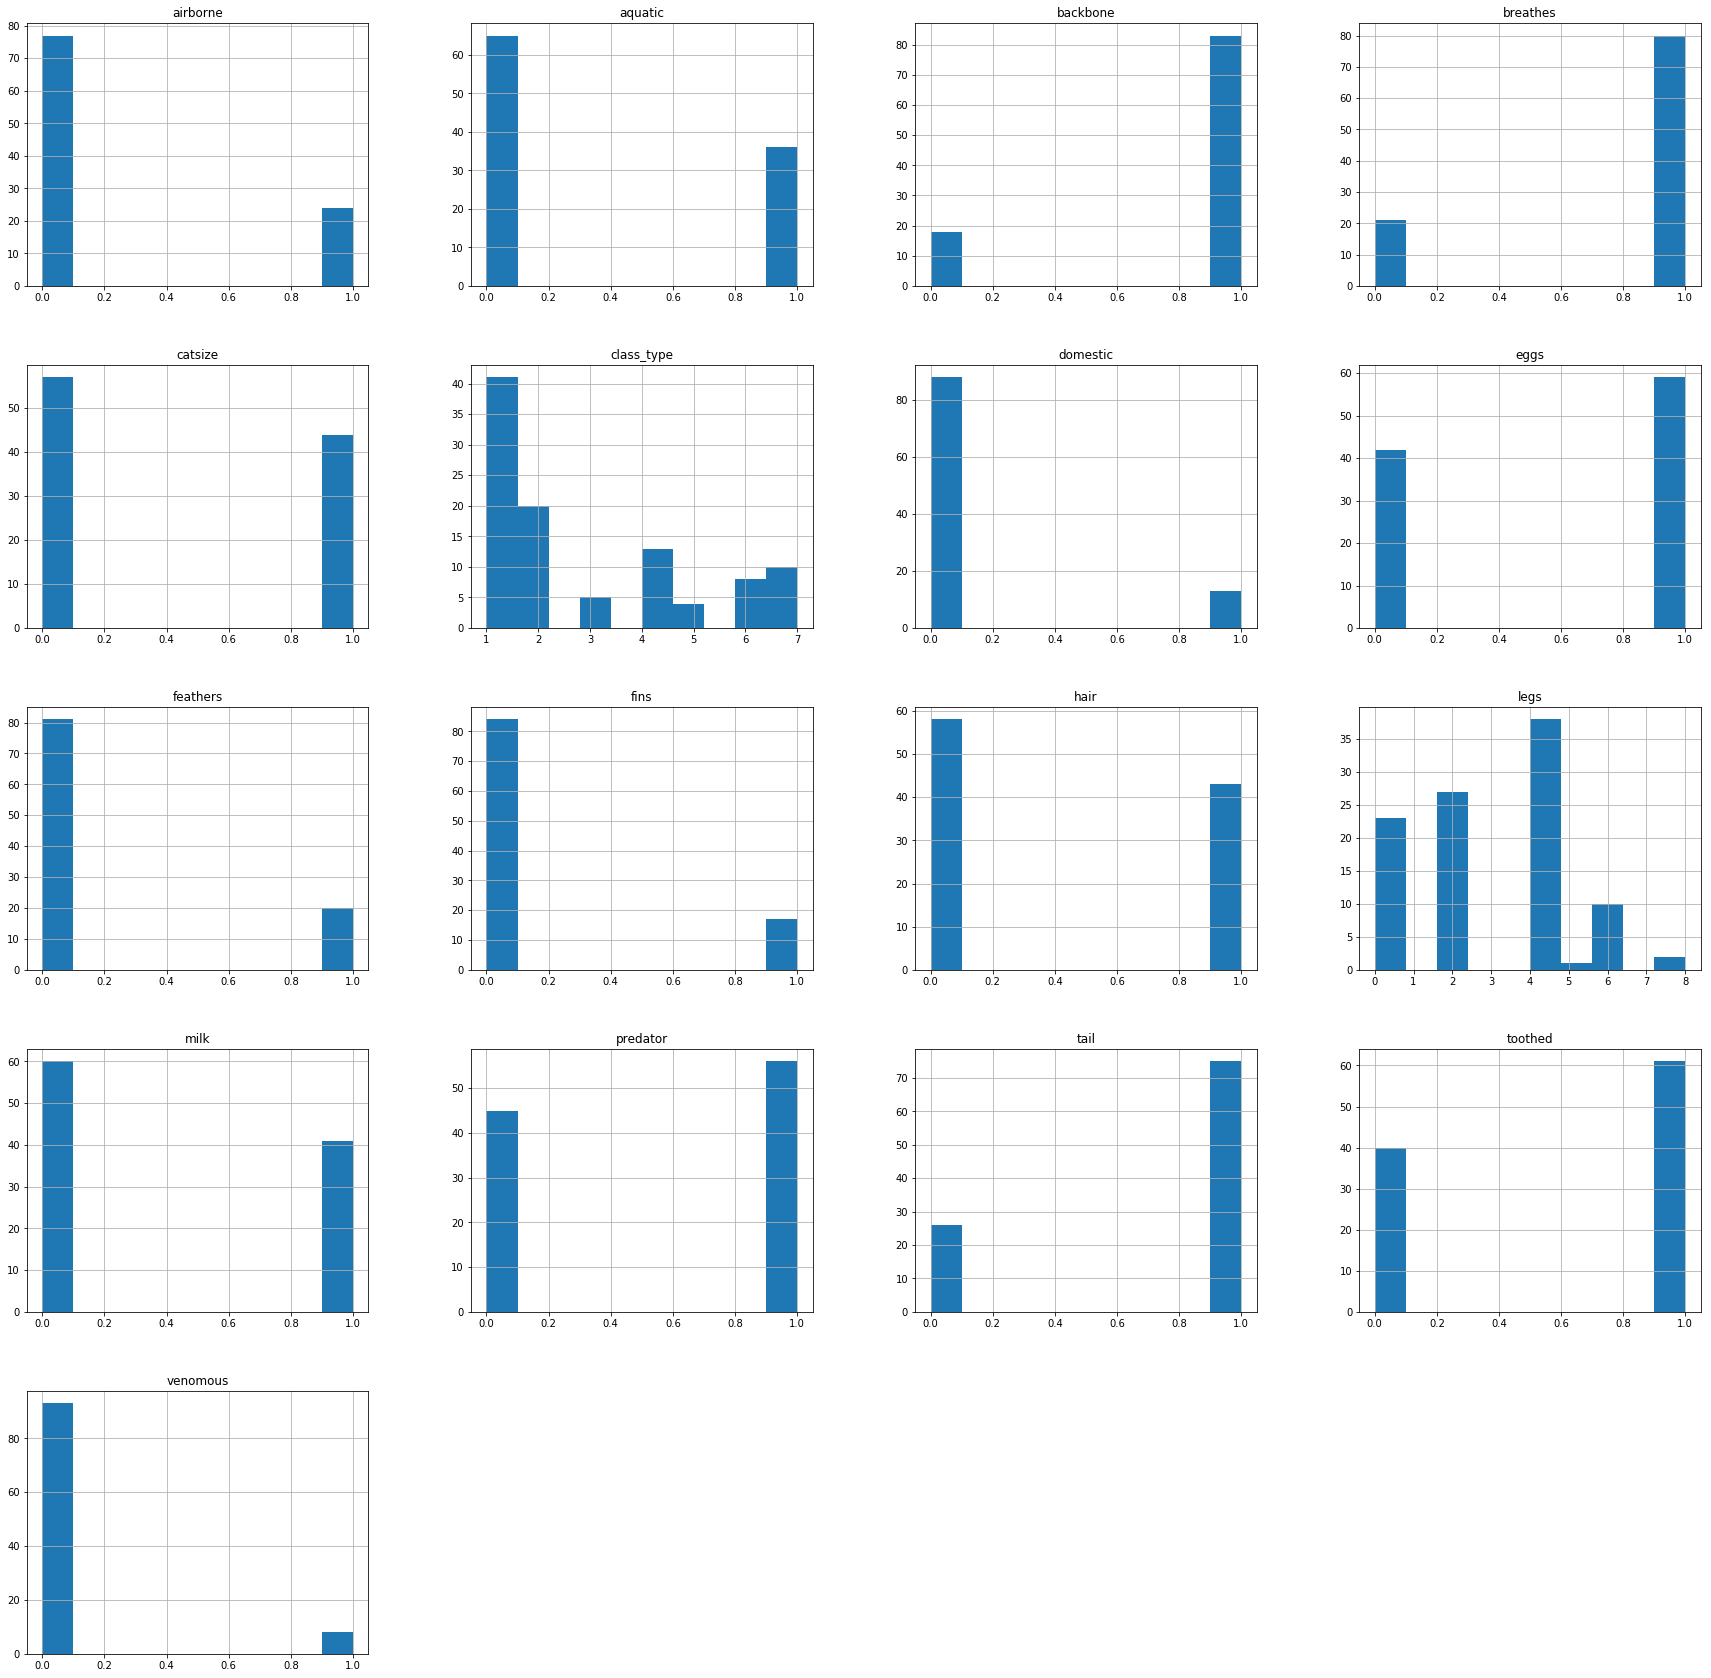

In [7]:
plt.rcParams['figure.figsize'] = (30.0, 30.0)
zoo_df.hist()
plt.show()

In [8]:
zoo_df.class_type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

### Correlation and plot these values

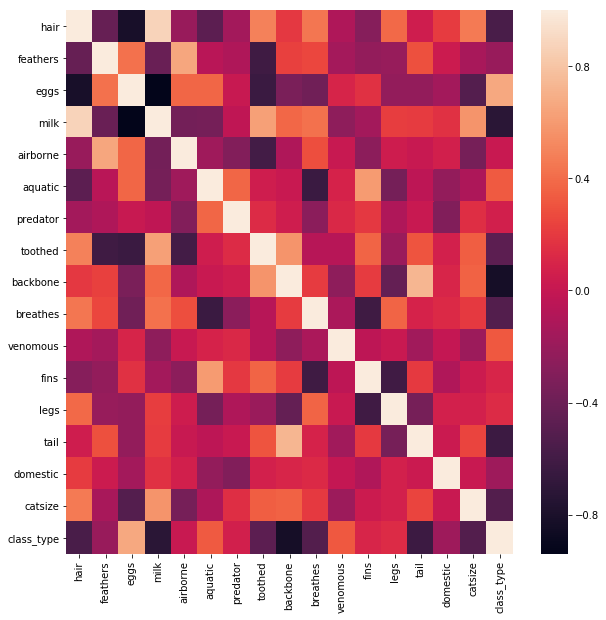

In [9]:
corr = zoo_df.corr()

# plot the heatmap
plt.rcParams['figure.figsize'] = (10.0, 10.0)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [10]:
corr.class_type

hair         -0.562384
feathers     -0.197520
eggs          0.661825
milk         -0.723683
airborne      0.022677
aquatic       0.326639
predator      0.061179
toothed      -0.471527
backbone     -0.828845
breathes     -0.519308
venomous      0.321476
fins          0.099430
legs          0.131693
tail         -0.631830
domestic     -0.181043
catsize      -0.521030
class_type    1.000000
Name: class_type, dtype: float64

Between class type and, airborne, predator and fin seem to be uncorrelated.  

### Seperate X and Y values from zoo_df

In [11]:
X = zoo_df.drop('class_type', axis=1)
Y = zoo_df['class_type']
validation_size = 0.20
seed = 7

### Running RFECV for finding important features

For feature selection, recursive feature elimination and cross-validated algorithm can be used.  

In [12]:
estimator = DecisionTreeClassifier()
rfecv = RFECV(estimator, step=1, cv=5)
rfecv = rfecv.fit(X, Y)

In [13]:
feature_names = X.columns[np.where(rfecv.support_ == True)[0]]
feature_names

Index(['feathers', 'milk', 'airborne', 'aquatic', 'predator', 'backbone',
       'breathes', 'fins', 'legs', 'domestic', 'catsize'],
      dtype='object')

### Drop unimportant features from X 

In [14]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X.head()

,feathers,milk,airborne,aquatic,predator,backbone,breathes,fins,legs,domestic,catsize
0,0,1,0,0,1,1,1,0,4,0,1
1,0,1,0,0,0,1,1,0,4,0,1
2,0,0,0,1,1,1,0,1,0,0,0
3,0,1,0,0,1,1,1,0,4,0,1
4,0,1,0,0,1,1,1,0,4,0,1


### Split train and test data

In [15]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size,random_state=seed)

### Build some models

In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    cv_results=cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.911573 (0.086593)
LDA: 0.821530 (0.129255)
KNN: 0.819856 (0.118647)
CART: 0.966623 (0.052472)
NB: 0.960707 (0.048410)
SVM: 0.899149 (0.094065)


## Select some models for general analyses.

#### Decision Tree Classifier

In [17]:
dtc = DecisionTreeClassifier();
dtc.fit(X_train,Y_train)
y_pred = dtc.predict(X_validation)
confusion_matrix(Y_validation, y_pred)

array([[7, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [18]:
accuracy_score(Y_validation, y_pred)

1.0

### Decision Tree Rule

The following figure shows the decision tree rule

For example, if milk value is upper than 0.5, this sample should be in the first class. 

If milk value is lower than 0.5 and feathers value is upper than 0.5, this sample should be in second class.

...

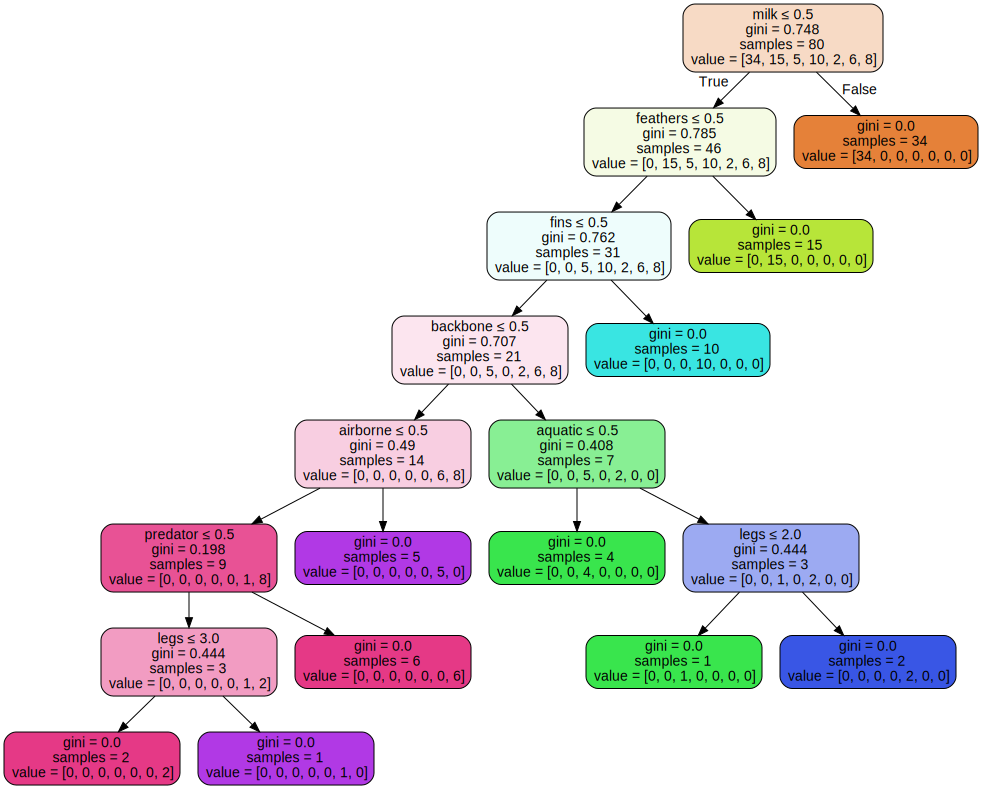

In [19]:
dot_data = export_graphviz(dtc, out_file=None,
                               feature_names = feature_names,
                               filled=True, rounded=True,
                               special_characters=True)

graph = graphviz.Source(dot_data)
graph

#### Gaussian Naive Bayes

In [20]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
y_pred_nb = nb.predict(X_validation)
confusion_matrix(Y_validation, y_pred_nb)

array([[7, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

In [21]:
accuracy_score(Y_validation, y_pred_nb)

1.0